<center><strong><h1>Universidade Federal de Alagoas</h1></strong></center>
<center><strong><h1>IC - Instituto de Computação</h1></strong></center>
<center><strong><h2>Sistemas de Controle II - 2022.1</h2></strong></center>

---

**Professor**: Ícaro Araújo

---

<center><strong><h2>Exemplo didático III</h2></strong></center>

A entrada é a força aplicada em fa e a saída é z.

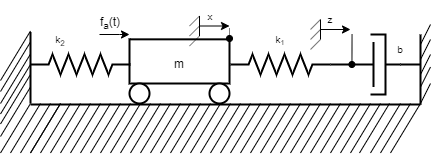

A partir da equação da força (f = m.a) de newton, podemos descrever o sistema acima, onde as forças aplicadas no bloco são iguais a aceleração vezes a massa do bloco.

No diagrama, podemos observar três elementos armazenadores de energia, logo podemos notar que o sistema será de ordem três. Os elementos armazenadores de energia são as molas $k_1$ e $k_2$ e a massa m. Portanto, escolhemos como nossas variáveis de estado as energias das molas dadas pela expressão F = k.x, onde k é a constante e x o deslocamento e para o bloco, por estar no nivel solo carrega apenas energia cinética, energia esta expressa como $Ec = (\frac{1}{2}).m.(v^2)$.

Variáveis de estado:

\begin{equation}
q_1 = x\\
q_2 = \dot{x}\\
q_3 = z\\
\end{equation}

Aplicando as equações no sistema temos:
F = m.a

Analisando as forças em x, temos:

fa(entrada) . - ($k_1$.(x - z) (Força da energia cinética menos a da mola) + $k_2$.x (Força da mola em $k_2$) = m (massa). $\ddot{x}$ (onde $\ddot{x}$ é a aceleração).

\begin{equation}
f_a - k_1.(x - z)  + k_2x = m \ddot{x}.
\end{equation}

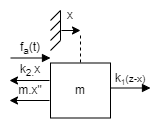

Analisando as forças em z, temos:

\begin{equation}
b.\dot{z} + k_1(x - z) = 0
\end{equation}

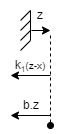

Agora, tomando as derivadas das variáveis, temos:

\begin{equation}
\dot{q_1} = \dot{x}\\
\dot{q_2} = \ddot{x} = \frac{di_L}{dt}(f_a-k_1x - k_2x + k_1z)\\ 
\dot{q_3} = \dot{z} = \frac{k_1}{b}(x-z)
\end{equation}

Subistituindo pelas variáveis, temos:

\begin{equation}
\dot{q_1} = q_2\\ 
\dot{q_2} = \frac{di_L}{dt}(f_a-k_1q_1 - k_2q_1 + k_1q_3)\\ 
\dot{q_3} = \frac{k_1}{b}(q_1-q_3)
\end{equation}

Das equações encontradas fazemos:

\begin{equation}
   \left\{\begin{matrix}
\dot{q} = & Aq + Bu\\ 
y= &  Cq + Du
\end{matrix}\right.
\end{equation}

Portanto:

\begin{equation}
\dot{x} = \begin{bmatrix}
 0& 1 & 0\\ 
  -\frac{k_1+k_2}{m} & 0 & \frac{k_1}{m}\\
    \frac{k_1}{b} & 0 & -\frac{k_1}{b}
\end{bmatrix}
⋅ q + \begin{bmatrix}
  0\\ 
  \frac{1}{m}\\
  0 
\end{bmatrix}
⋅ u
\end{equation}

\begin{equation}
y = \begin{bmatrix} 
  0 & 0 & 1 
\end{bmatrix}
⋅ q + \begin{bmatrix} 
  0 
\end{bmatrix}
⋅ u
\end{equation}

In [ ]:
!pip install control

# Inicializando as bibliotecas



In [ ]:
import control
from control import matlab
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.signal import ss2tf, bessel, lsim, lti
from numpy.linalg import matrix_power
from numpy.linalg import matrix_rank

# Declarando a matriz A, B, C e D

Considerando os valores de k1 = k2 = 1 N/m, b = Ns/m e massa = 1 kg, temos:

In [ ]:
A = [[0, 1, 0], [-2, 0, 1], [1, 0, -1]]
B = [[0], [1], [0]] 
C = [0, 0, 1]
D = 0

# Calculando a função de transferência
Usando a função ss2ft(), podemos calcular a função de transferência, essa função necessita de quatro argumentos as matrizes A, B, C e D. 
Passando D como 0.

In [ ]:
haux = ss2tf(A, B, C, D)
h = control.ss2tf(control.ss(A, B, C, [[0]]))
print(h)


-2.22e-16 s^2 - 1.776e-15 s + 1
-------------------------------
      s^3 + s^2 + 2 s + 1



# Determinando o tipo do sistema
Usamos a variavel haux para receber a função de transferência em forma de tupla, pegando o tamanho do denominador da função de tranferência, fazendo um ciclo de repetição, onde verificamos a quantidade de polos na origem. Verificando a quantidade de '0' seguidos da direita para a esquerda no denominador, que significa, a quantidade de polos na origem, desse modo identificando o tipo do sistema.

In [ ]:
n = len(haux[1])

#Verificando o tipo da matriz

count = 0
i = n-1
while i >= 0:
    if haux[1][i] == 0:
        count += 1
    else:
        break
    i -= 1

if count == 0:
    print('Sistema do tipo 0')
elif count == 1:
    print('Sistema do tipo 1')
else:
    print('sistema do tipo 2')

Sistema do tipo 0


# Plotando a resposta ao degrau
Usando a função control.step_response(), aplicamos a resposta ao degrau na função na tupla t,y que é o tempo pela saída. Plotando a saída pelo tempo utilizando a matplot obtemos:

In [ ]:
#Plots
def Resposta(t, y, sinal,title, xlabel, ylabel):
  plt.plot(t, sinal, 'b',)
  plt.plot(t, y, 'k',)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(0.5)
  plt.show()
  print()

RESPOSTA AO DEGRAU:


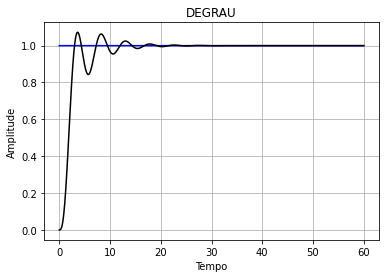

In [ ]:
tempo      = np.arange(0,60,0.01)          #Vetor de tempo   (60 segundos)
u_degrau   = np.full(len(tempo),1)         #Sinal de entrada (Degrau unitário)
system = matlab.StateSpace(A, B, C, D)
y_d, t_d, x_d = matlab.lsim(system, u_degrau, tempo)   #Resposta do sistema so Degrau

#Plot da resposta ao Degrau
print('\033[1m'+'RESPOSTA AO DEGRAU'+'\033[0m:')
Resposta(tempo, y_d, u_degrau, 'DEGRAU','Tempo','Amplitude')

# Plotando a resposta á rampa

/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1632: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


RESPOSTA À RAMPA:


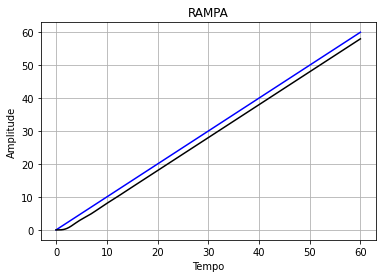

In [ ]:
u_rampa    = np.full(len(tempo),tempo)     #Sinal de entrada (Rampa)
t_r, y_r = control.forced_response(h, T=tempo,U=tempo)   #Resposta do sistema à Rampa

#Plot da resposta à Rampa
print('\033[1m'+'RESPOSTA À RAMPA'+'\033[0m:')
Resposta(tempo, y_r, u_rampa,'RAMPA','Tempo','Amplitude')

# Plotando a resposta á parábola

/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1632: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


RESPOSTA À PARÁBOLA:


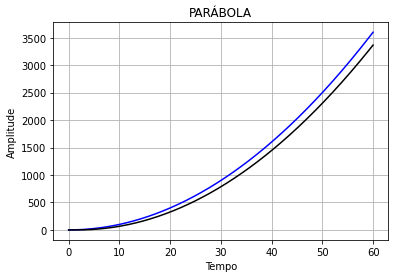

In [ ]:
u_parabola = np.full(len(tempo),tempo**2)  #Sinal de entrada (Parábola)
t_p, y_p = control.forced_response(h, T=tempo,U=np.square(tempo))   #Resposta do sistema à Parábola

#Plot da resposta à Parábola
print('\033[1m'+'RESPOSTA À PARÁBOLA'+'\033[0m:')
Resposta(t_p, y_p, u_parabola,'PARÁBOLA','Tempo','Amplitude')

# Determinando a controlabilidade
Para encontrar a controlabilidade, criamos duas listas auxiliares, na primeira(AB = [ ]) adicionamos o produto(np.dot( )) da matriz A pela matriz B, e na segunda matriz (A2B = [ ]) adicionamos o produto da matriz A² pela matriz B, onde n é o expoente da matriz A. No final do loop concatenamos(np.concatenate( ) as três matrizes na matriz 'Crtl'. E no final pegamos o determinante usando a função np.linalg.det( ). Reproduzinho exatamente conforme a fórmula:

$$\zeta = \begin{bmatrix}
    B & AB & A^{2}B & \dots  & A^{n-1}B \\
\end{bmatrix}$$ 

Onde se o posto for igual n o sistema é dito controlável. Outro método, é pelo determinante da matriz zeta.

In [ ]:
#Matriz de Controlabilidade do sistema
CTR = ctrb(A,B)

print('\033[1m'+'MATRIZ DE CONTROLABILIDADE DO SISTEMA'+'\033[0m:\n')
print(CTR)

print('\033[1m'+'POSTO DA MATRIZ DE CONTROLABILIDADE'+'\033[0m:\n')
print(matrix_rank(CTR))

MATRIZ DE CONTROLABILIDADE DO SISTEMA:

[[ 0.  1.  0.]
 [ 1.  0. -2.]
 [ 0.  0.  1.]]
POSTO DA MATRIZ DE CONTROLABILIDADE:

3


Como vemos o rank do posto da matriz é igual a ordem, logo o sistema é controlável.

# Determinando a observabilidade
Para encontrar a controlabilidade, criamos duas listas auxiliares, na primeira(AC = [ ]) adicionamos o produto(np.dot()) da matriz A pela matriz C, e na segunda matriz (A2C = [ ]) adicionamos o produto da matriz A² pela matriz C, onde n é o expoente da matriz A. No final do loop concatenamos(np.concatenate( ) as três matrizes na matriz 'Obs'. E no final pegamos o determinante usando a função np.linalg.det( ).
Reproduzinho exatamente conforme a fórmula: 

$$O = \begin{bmatrix}
    C \\
    CA \\
    CA^{2} \\
    \dots \\
    CA^{n-1}
\end{bmatrix}$$ 

Onde se o posto for igual n o sistema é dito observável. Outro método, é pelo determinante da matriz O.

In [ ]:
#Matriz de Observabilidade do sistema
OBS = obsv(A,C)

print('\033[1m'+'MATRIZ DE OBSERVABILIDADE DO SISTEMA'+'\033[0m:\n')
print(OBS)

print('\033[1m'+'POSTO DA MATRIZ DE OBSERVABILIDADE'+'\033[0m:\n')
print(matrix_rank(OBS))

MATRIZ DE OBSERVABILIDADE DO SISTEMA:

[[ 0.  0.  1.]
 [ 1.  0. -1.]
 [-1.  1.  1.]]
POSTO DA MATRIZ DE OBSERVABILIDADE:

3


Como vemos o posto da matriz é 3 assim como a ordem dela, logo o sistema é Observável.

# Critérios de desempenho
Agora vendo os polos e os zeros podemos analisar as caracteristicas da função de transferência

In [ ]:
polo = h.pole()
print('-----------------------------------------------------------------------------------------')
print('Os polos são: {}'.format(polo))
print('A função não possui zeros')
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
Os polos são: [-0.21507985+1.30714128j -0.21507985-1.30714128j -0.56984029+0.j        ]
A função não possui zeros
-----------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:1632: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


Plotando o gráfico as raizes no lugar geométrico, podemos ver os valores vistos anteriormente na prática.


-2.22e-16 s^2 - 1.776e-15 s + 1
-------------------------------
      s^3 + s^2 + 2 s + 1



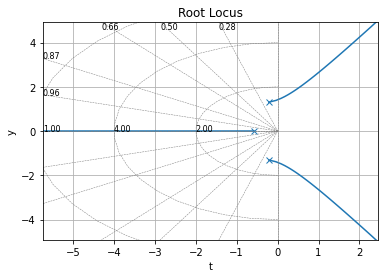

In [ ]:
j = tf([1],[1,1,2,1])

print(h)

r = rlocus(j)
plt.grid()
plt.xlabel('t')
plt.ylabel('y')
plt.show()

Disto, podemos ver que o sistema é subamortecido, pois podemos ver pelo gráfico da resposta ao degrau e por meio das raízes, que o sistema possui polos complexos conjugados. E estável, pois possui suas raízes no lado esquerdo do eixo Im.


Agora já por meio da função step_info(), podemos ver as informações a resposta ao degrau da função. Reescrevi a função, pois o python considera os valores muito pequenos na hora do calculo, dando valores absurdos de overshoot.

In [ ]:
num = [1]
den = [ 1,  1, 2, 1]

tF = control.tf(num,den)
control.step_info(tF)

{'RiseTime': 1.8892450283884656,
 'SettlingTime': 13.602564204396954,
 'SettlingMin': 0.8435045700229874,
 'SettlingMax': 1.0726541441151771,
 'Overshoot': 7.265414411517712,
 'Undershoot': 0,
 'Peak': 1.0726541441151771,
 'PeakTime': 3.5895655539380846,
 'SteadyStateValue': 1.0}

# Tempo de pico
O tempo de pico é o instante onde ocorre o primeiro pico de y(t).

Pelo método control.step, obtemos aproximadamente 3.6s, como tempo de pico. 

E a resposta no tempo de pico obtida é de aproximadamente 1.1s.

# Overshoot

O valor de sobressinal (Overshoot) é dado por meio da fórmula:

$$M_p = \frac{y(t_p) - yss}{yss} $$

Onde: $$yss = \lim_{t\rightarrow \infty} y(t)$$ Onde obtivemos o valor de 1.07.

# Tempo de subida

Observando a resposta ao degrau e por meio da função control_info(), podemos ver que o tempo de subida é 1s.

# Tempo de acomodação

O tempo de acomodação é o tempo em que y(t) leva para atingir $\pm 2\%$ ou $\pm 5\%$ de seu valor final. Obtivemos que é de aproximadamente:$$t_s \rightarrow 13.6s$$